# CIFAR - 10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:

airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck										

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [1]:
# File path as a string

CIFAR_DIR = 'cifar-10-batches-py/'

# Dataset layout

I will describe the layout of the Python version of the dataset. The layout of the Matlab version is identical. 

The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle. Here is a python3 routine which will open such a file and return a dictionary:

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Loaded in this way, each of the batch files contains a dictionary with the following elements:
data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [3]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

In [4]:
all_data = [0, 1, 2, 3, 4, 5, 6]

In [5]:
for i, direc in zip(all_data, dirs):
    all_data[i] = unpickle(CIFAR_DIR + direc)

In [6]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [7]:
batch_meta

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

### All the label names and 'b' stands for bytes literal

In [8]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

* label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

## To display a single image using matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
single_img = data_batch1[b"data"]
single_img.shape

(10000, 3072)

In [11]:
# To reshape image for viewing

single_img = single_img.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")

In [12]:
single_img[0].shape

(32, 32, 3)

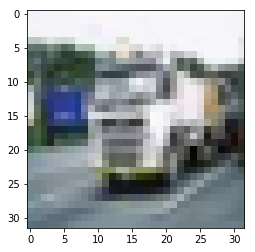

In [13]:
plt.imshow(single_img[1000])

# Helper functions to deal with the data

In [14]:
# To one-hot encode the 10 possible labels

def one_hot_encode(vec, vals = 10):
    
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [15]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        # Grabs a list of all the data batches for training
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        self.test_batch = [test_batch]
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        # Vertically stacks the training images
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        # Reshapes and normalizes training images
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

### How to use the above code:

In [16]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
batch = ch.next_batch(100)

Setting Up Training Images and Labels
Setting Up Test Images and Labels


## Creating the Model

In [17]:
import tensorflow as tf

In [18]:
# Two placeholders for x and y_true

x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])               # 32 x 32 pixels and 3 color channels
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [19]:
# Another placeholder for dropout

hold_prob = tf.placeholder(tf.float32)

## Creating the helper functions for the weights, biases, conv2d, maxpool2x2, convLayer, fullLayer

In [20]:
def init_weights(shape):
    init_random_distrib = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(init_random_distrib)

In [21]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape = shape)
    return tf.Variable(init_bias_vals)

In [22]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')

In [23]:
def maxpool2x2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

## Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [24]:
def conv_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [25]:
# Fully Connected layer:

def full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [26]:
## Creating the layers:

conv_1 = conv_layer(x, shape = [4, 4, 3, 32])
conv_1_pool = maxpool2x2(conv_1)

In [27]:
conv_2 = conv_layer(conv_1_pool, shape = [4, 4, 32, 64])
conv_2_pool = maxpool2x2(conv_2)

In [28]:
## Flattening the layer by reshaping the pooling layer into [-1, 8 * 8 * 64]

conv_2_flat = tf.reshape(conv_2_pool, shape = [-1, 8 * 8 * 64])

In [29]:
## Creating the fully connected layers:

full_layer_1 = tf.nn.relu(full_layer(conv_2_flat, 512))

In [30]:
## Dropout layer:

full_layer_1_dropout = tf.nn.dropout(full_layer_1, keep_prob = hold_prob)

In [31]:
# Output 

y_pred = full_layer(full_layer_1_dropout, 10)

## Loss function: -

In [32]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y_pred ))

## Optimizer: -

In [33]:
# Using Adam optimizer

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cross_entropy)

In [34]:
init = tf.global_variables_initializer()

## Graph Session: -

In [ ]:
with tf.Sessions() as sess:
    sess.run(init)
    
    with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(5000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0}))
            print('\n')

# Conclusion: -

## We get an accuracy of 69%